# Análise de PERT/CPM
Este notebook realiza uma análise de PERT/CPM baseada no projeto descrito, considerando as atividades, dependências e durações fornecidas.

## Objetivos
- Determinar o caminho crítico.
- Calcular os tempos de início e término (mais cedo e mais tarde).
- Gerar gráficos para visualizar o progresso.


In [10]:
# Importar bibliotecas necessárias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Carregar Dados do Projeto
O arquivo CSV contém as informações das atividades, dependências e durações estimadas.

In [11]:
# Carregar dados do CSV
data = pd.DataFrame({
    'Atividade': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'],
    'Descrição': ['Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior'],
    'Atividades Precedentes': [None, 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L'],
    'Duração Estimada': [2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6]
})
data

,Atividade,Descrição,Atividades Precedentes,Duração Estimada
0,A,Escavação,None,2
1,B,Fundação,A,4
2,C,Paredes,B,10
3,D,Telhado,C,6
4,E,Encanamento Exterior,C,4
5,F,Encanamento Interior,E,5
6,G,Muros,D,7
7,H,Pintura Exterior,"E,G",9
8,I,Instalação Elétrica,C,7
9,J,Divisórias,"F,I",8


## Criar o Grafo do Projeto
A partir das dependências, construímos um grafo dirigido para representar as relações entre as atividades.

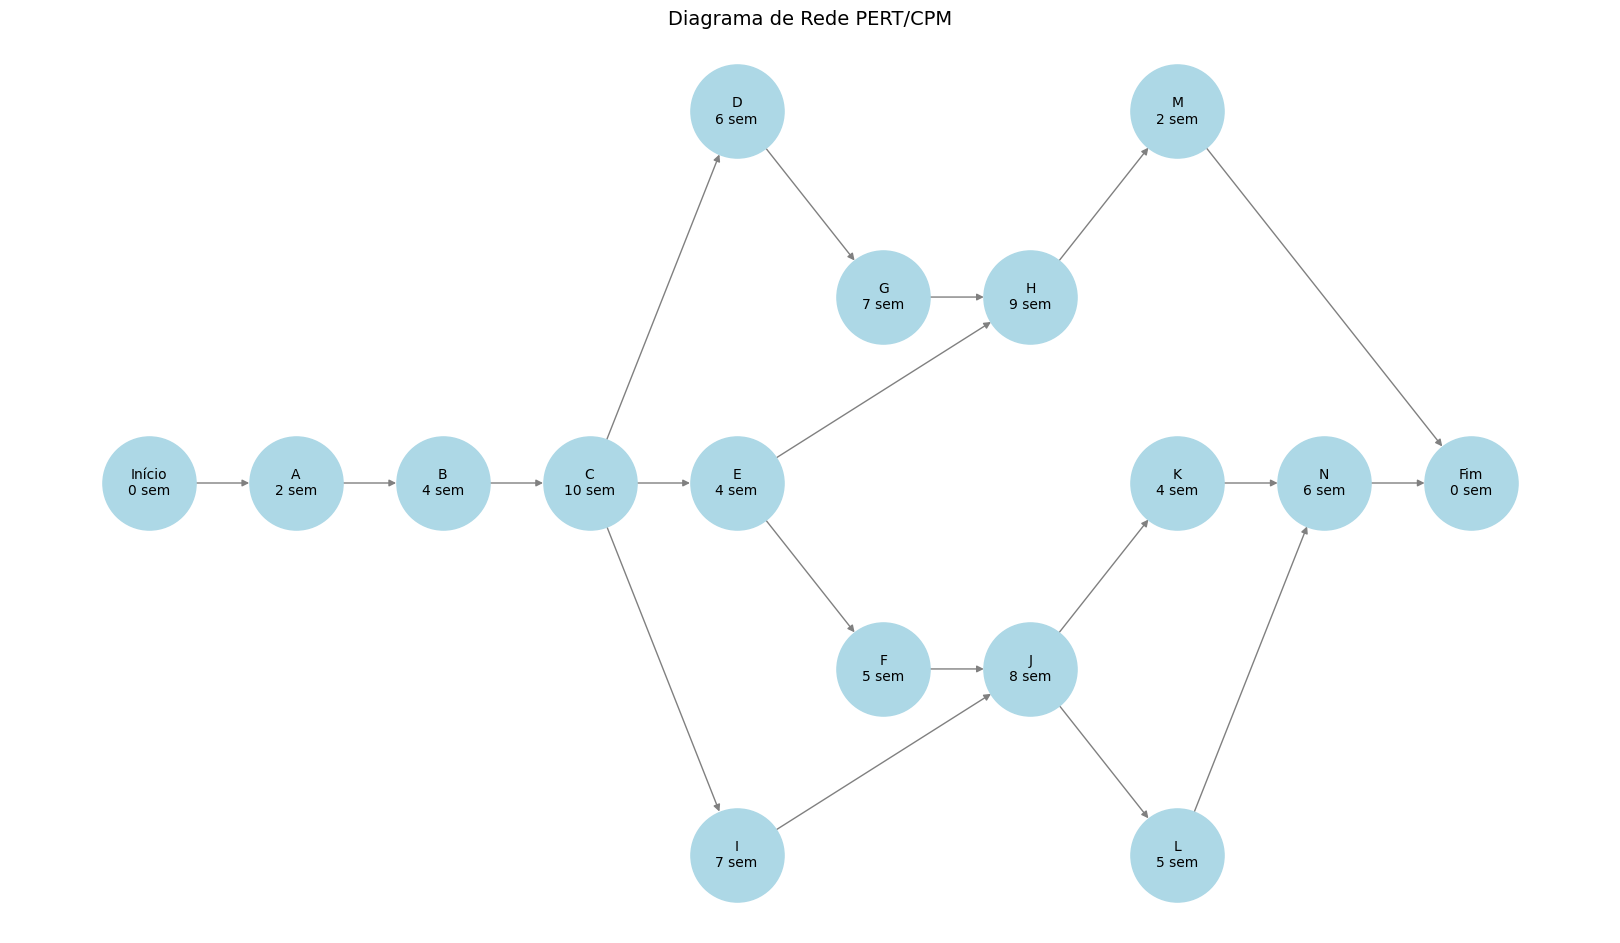

In [50]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Exemplo de DataFrame
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Criar o grafo de PERT/CPM
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for i, row in data.iterrows():
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])
    if row['Atividades Precedentes']:
        precedentes = row['Atividades Precedentes'].split(',')
        for p in precedentes:
            G.add_edge(p.strip(), row['Atividade'])

# Função para calcular os níveis das atividades (hierarquia top-down)
def calculate_levels(graph):
    levels = {}
    for node in nx.topological_sort(graph):  # Garante ordem topológica
        if len(list(graph.predecessors(node))) == 0:
            levels[node] = 0
        else:
            levels[node] = max([levels[p] for p in graph.predecessors(node)]) + 1
    return levels

# Calcular os níveis das atividades
levels = calculate_levels(G)

# Atribuir os níveis como atributos aos nós
nx.set_node_attributes(G, levels, "subset")

# Calcular o layout dos nós com espaçamento ajustado
pos = nx.multipartite_layout(G, subset_key="subset")
vertical_spacing = 2.0  # Ajuste do espaçamento vertical
for node in pos:
    x, y = pos[node]
    pos[node] = (x, y * vertical_spacing)

# Melhorar a visualização do grafo
plt.figure(figsize=(16, 9))

# Desenhar o grafo
nx.draw(
    G,
    pos,
    with_labels=False,  # Desativa os rótulos padrão
    node_size=4500,     # Ajusta o tamanho dos nós
    node_color='lightblue', 
    edge_color='gray',
    arrowsize=10
)

# Adicionar rótulos personalizados nos nós (Nome e Duração)
labels = nx.get_node_attributes(G, 'duração')
custom_labels = {n: f"{n}\n{d} sem" for n, d in labels.items()}
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10)

# Adicionar título
plt.title("Diagrama de Rede PERT/CPM", fontsize=14)

# Exibir o gráfico
plt.show()


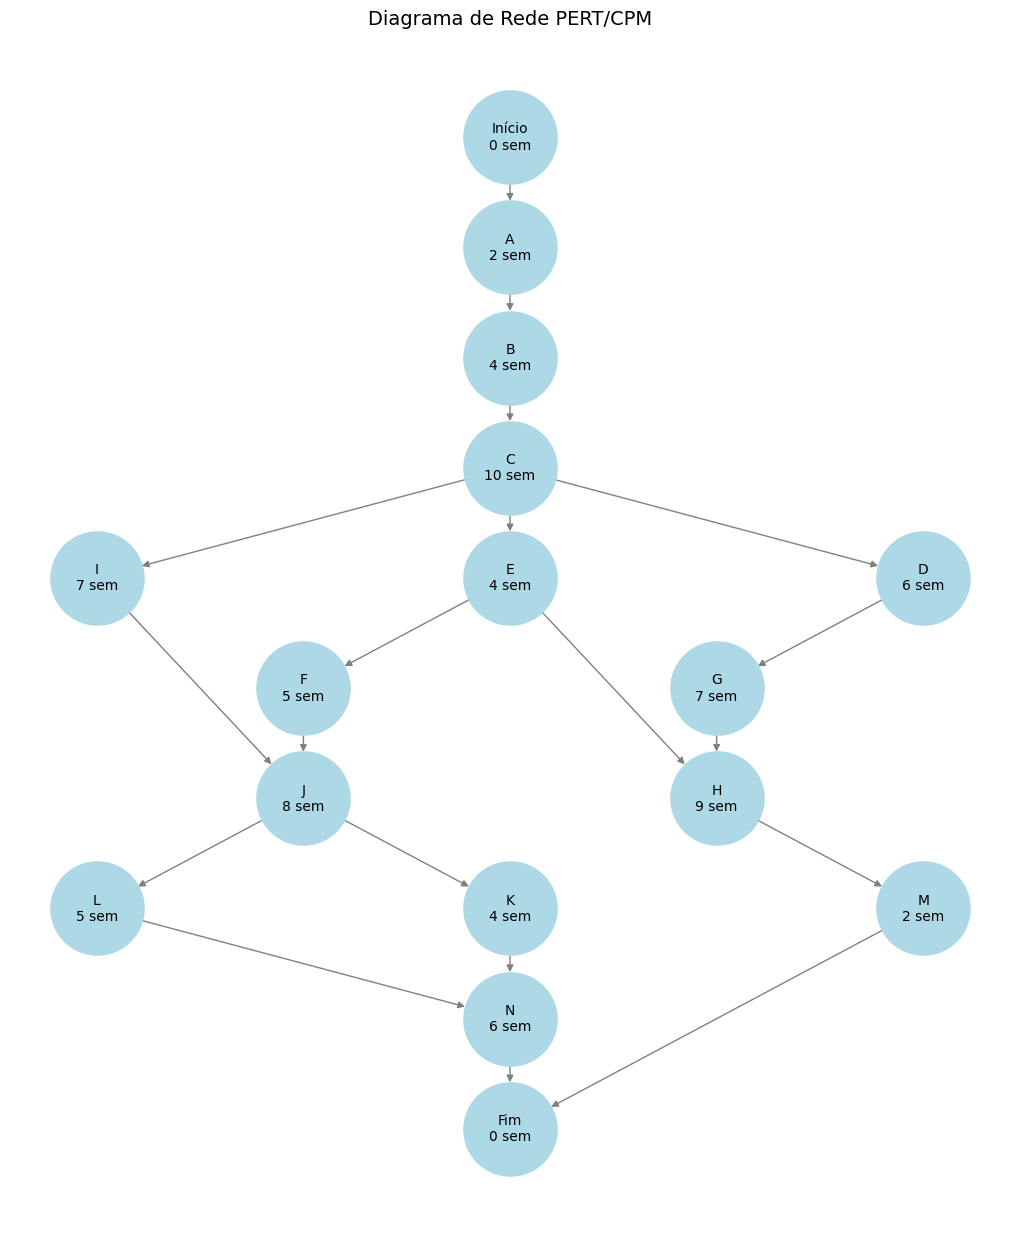

In [51]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Exemplo de DataFrame
data = pd.DataFrame({
    'Atividade': ['Início', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Fim'],
    'Descrição': ['Início','Escavação', 'Fundação', 'Paredes', 'Telhado', 'Encanamento Exterior', 
                  'Encanamento Interior', 'Muros', 'Pintura Exterior', 'Instalação Elétrica', 'Divisórias', 
                  'Piso', 'Pintura Interior', 'Acabamento Exterior', 'Acabamento Interior', 'Fim'],
    'Atividades Precedentes': [None, 'Início', 'A', 'B', 'C', 'C', 'E', 'D', 'E,G', 'C', 'F,I', 'J', 'J', 'H', 'K,L', 'M,N'],
    'Duração Estimada': [0, 2, 4, 10, 6, 4, 5, 7, 9, 7, 8, 4, 5, 2, 6, 0]
})

# Criar o grafo de PERT/CPM
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo
for i, row in data.iterrows():
    G.add_node(row['Atividade'], duração=row['Duração Estimada'])
    if row['Atividades Precedentes']:
        precedentes = row['Atividades Precedentes'].split(',')
        for p in precedentes:
            G.add_edge(p.strip(), row['Atividade'])

# Função para calcular os níveis das atividades (hierarquia top-down)
def calculate_levels(graph):
    levels = {}
    for node in nx.topological_sort(graph):  # Garante ordem topológica
        if len(list(graph.predecessors(node))) == 0:
            levels[node] = 0
        else:
            levels[node] = max([levels[p] for p in graph.predecessors(node)]) + 1
    return levels

# Calcular os níveis das atividades
levels = calculate_levels(G)

# Atribuir os níveis como atributos aos nós
nx.set_node_attributes(G, levels, "subset")

# Calcular o layout dos nós com espaçamento ajustado (invertendo os eixos para orientação vertical)
pos = nx.multipartite_layout(G, subset_key="subset")
vertical_spacing = 2.0  # Ajuste do espaçamento vertical
horizontal_spacing = 2.0  # Ajuste do espaçamento horizontal
for node in pos:
    x, y = pos[node]
    pos[node] = (y * horizontal_spacing, -x * vertical_spacing)  # Trocar os eixos e inverter o nível para ordem top-down

# Melhorar a visualização do grafo
plt.figure(figsize=(10, 12))

# Desenhar o grafo
nx.draw(
    G,
    pos,
    with_labels=False,  # Desativa os rótulos padrão
    node_size=4500,     # Ajusta o tamanho dos nós
    node_color='lightblue', 
    edge_color='gray',
    arrowsize=10
)

# Adicionar rótulos personalizados nos nós (Nome e Duração)
labels = nx.get_node_attributes(G, 'duração')
custom_labels = {n: f"{n}\n{d} sem" for n, d in labels.items()}
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10)

# Adicionar título
plt.title("Diagrama de Rede PERT/CPM", fontsize=14)

# Exibir o gráfico
plt.show()
